In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import holidays
import datetime

In [2]:
energy_df = pd.read_csv('energiedaten3.csv', sep=';', decimal=',')
energy_df['zeit'] = pd.to_datetime(energy_df['zeit'], format='%d.%m.%Y %H:%M')
timestamp_s = energy_df['zeit'].map(pd.Timestamp.timestamp)
energy_df


,zeit,stromverbrauch
0,2017-01-01 00:15:00,6.28
1,2017-01-01 00:30:00,6.12
2,2017-01-01 00:45:00,6.48
3,2017-01-01 01:00:00,6.12
4,2017-01-01 01:15:00,6.24
...,...,...
207475,2022-12-01 23:00:00,9.20
207476,2022-12-01 23:15:00,8.56
207477,2022-12-01 23:30:00,7.40
207478,2022-12-01 23:45:00,7.24


In [3]:
day = 24*60*60
year = (365.2425)*day
hour = 60*60

#Sinus/Cos hinzufügen
energy_df['hour sin'] = np.sin(timestamp_s * (2 * np.pi / hour))
energy_df['hour cos'] = np.cos(timestamp_s * (2 * np.pi / hour))
energy_df['Day sin'] = np.sin(timestamp_s * ( 2* np.pi / day))
energy_df['Day cos'] = np.cos(timestamp_s * (2* np.pi / day))
energy_df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
energy_df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

#Wochentag hinzufügen
energy_df.index=pd.to_datetime(energy_df['zeit'],format='%d.%m.%Y %H:%M')
energy_df['wochentag']=energy_df['zeit'].dt.dayofweek
energy_df

,zeit,stromverbrauch,hour sin,hour cos,Day sin,Day cos,Year sin,Year cos,wochentag
zeit,,,,,,,,,
2017-01-01 00:15:00,2017-01-01 00:15:00,6.28,1.000000e+00,5.476139e-11,6.540313e-02,0.997859,0.010544,0.999944,6
2017-01-01 00:30:00,2017-01-01 00:30:00,6.12,1.155324e-10,-1.000000e+00,1.305262e-01,0.991445,0.010723,0.999943,6
2017-01-01 00:45:00,2017-01-01 00:45:00,6.48,-1.000000e+00,-1.763034e-10,1.950903e-01,0.980785,0.010902,0.999941,6
2017-01-01 01:00:00,2017-01-01 01:00:00,6.12,2.285869e-10,1.000000e+00,2.588190e-01,0.965926,0.011081,0.999939,6
2017-01-01 01:15:00,2017-01-01 01:15:00,6.24,1.000000e+00,-1.678159e-10,3.214395e-01,0.946930,0.011260,0.999937,6
...,...,...,...,...,...,...,...,...,...
2022-12-01 23:00:00,2022-12-01 23:00:00,9.20,2.531594e-10,1.000000e+00,-2.588190e-01,0.965926,-0.491893,0.870656,3
2022-12-01 23:15:00,2022-12-01 23:15:00,8.56,1.000000e+00,-1.923884e-10,-1.950903e-01,0.980785,-0.491737,0.870744,3
2022-12-01 23:30:00,2022-12-01 23:30:00,7.40,-1.316174e-10,-1.000000e+00,-1.305262e-01,0.991445,-0.491581,0.870832,3


<function matplotlib.pyplot.show(close=None, block=None)>

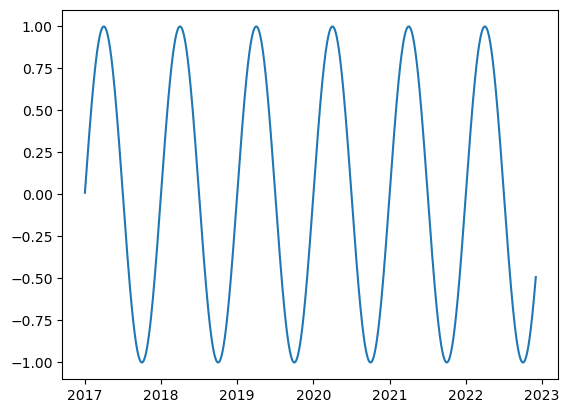

In [4]:
#Plotten zum Test mit allen Spalten, zum Eingrenzen [:1000]
plt.plot(energy_df['Year sin'])
plt.show

In [5]:
#Normalisieren
max_sum_kWh =energy_df['stromverbrauch'].max()
max_sum_kWh 
energy_df['stromverbrauch'] = energy_df['stromverbrauch'] / max_sum_kWh

#Datentyp umwandeln
energy_df['stromverbrauch'] = energy_df['stromverbrauch'].astype(float)

#Durchschnittlicherverbrauch pro WochenTag und hinzufügen  in Dataframe
average_consumption_by_weekday = energy_df.groupby('wochentag')['stromverbrauch'].mean()
energy_df['Average Consumption Weekday'] = energy_df['wochentag'].map(average_consumption_by_weekday)

#Durchschnittlicherverbrauch pro Stunde
average_consumption_by_hour = energy_df.groupby('hour sin')['stromverbrauch'].mean()
energy_df['Average Consumption hour sin'] = energy_df['hour sin'].map(average_consumption_by_hour)


#Spalten löschen
columns_to_drop= ['zeit','wochentag']
energy_df=energy_df.drop(columns_to_drop, axis=1)
energy_df


,stromverbrauch,hour sin,hour cos,Day sin,Day cos,Year sin,Year cos,Average Consumption Weekday,Average Consumption hour sin
zeit,,,,,,,,,
2017-01-01 00:15:00,0.080266,1.000000e+00,5.476139e-11,6.540313e-02,0.997859,0.010544,0.999944,0.094065,0.152428
2017-01-01 00:30:00,0.078221,1.155324e-10,-1.000000e+00,1.305262e-01,0.991445,0.010723,0.999943,0.094065,0.078221
2017-01-01 00:45:00,0.082822,-1.000000e+00,-1.763034e-10,1.950903e-01,0.980785,0.010902,0.999941,0.094065,0.152762
2017-01-01 01:00:00,0.078221,2.285869e-10,1.000000e+00,2.588190e-01,0.965926,0.011081,0.999939,0.094065,0.078221
2017-01-01 01:15:00,0.079755,1.000000e+00,-1.678159e-10,3.214395e-01,0.946930,0.011260,0.999937,0.094065,0.152428
...,...,...,...,...,...,...,...,...,...
2022-12-01 23:00:00,0.117587,2.531594e-10,1.000000e+00,-2.588190e-01,0.965926,-0.491893,0.870656,0.175431,0.117587
2022-12-01 23:15:00,0.109407,1.000000e+00,-1.923884e-10,-1.950903e-01,0.980785,-0.491737,0.870744,0.175431,0.152428
2022-12-01 23:30:00,0.094581,-1.316174e-10,-1.000000e+00,-1.305262e-01,0.991445,-0.491581,0.870832,0.175431,0.094581


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Layer
from tensorflow.keras import layers, regularizers
from tensorflow.keras import Model
from sklearn.preprocessing import MinMaxScaler

# Aufteilung in Features und Labels
X = energy_df[['stromverbrauch','Day sin', 'Day cos', 'Year sin', 'Year cos', 'Average Consumption hour sin','hour cos','hour sin','Average Consumption Weekday']]                            #Wenn man Stromverbrauch rauslässt trotzdem gute Ergebnisse
y = energy_df['stromverbrauch']

# Normierung der Daten (z.B. Min-Max-Skalierung)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Sequenzbildung
sequence_length = 40                                                                                                             #Beispiel: Sequenzen von 10 aufeinander folgenden Zeitschritten
X_sequences, y_sequences = [], []

for i in range(len(X_scaled) - sequence_length):    
   X_sequences.append(X_scaled[i:i+sequence_length, :])
   y_sequences.append(y.iloc[i+sequence_length])

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)



# Festlegung der Größe für Training und Test
train_size = int(0.95 * len(X_sequences))
test_size = 2
val_size = len(X_sequences) - train_size - test_size

# Aufteilung in Trainings-, Validierungs- und Testdatensätze
X_train = X_sequences[:train_size]
y_train = y_sequences[:train_size]

X_val = X_sequences[train_size:train_size+val_size]
y_val = y_sequences[train_size:train_size+val_size]

X_test = X_sequences[train_size+val_size:train_size+val_size+test_size]
y_test = y_sequences[train_size+val_size:train_size+val_size+test_size]


# Überprüfen der Shape der Datensätze
print("Trainingsdaten:", X_train.shape, y_train.shape)
print("Validierungsdaten:", X_val.shape, y_val.shape)
print("Testdaten:", X_test.shape, y_test.shape)

Trainingsdaten: (197068, 40, 9) (197068,)
Validierungsdaten: (10370, 40, 9) (10370,)
Testdaten: (2, 40, 9) (2,)


Alternativ mit mehr Inputdaten:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Layer
from tensorflow.keras import layers, regularizers
from tensorflow.keras import Model
from sklearn.preprocessing import MinMaxScaler

# Aufteilung in Features und Labels
X = energy_df[['Day sin', 'Day cos', 'Year sin', 'Year cos', 'Average Consumption']]
y = energy_df['stromverbrauch']

# Normierung der Daten (z.B. Min-Max-Skalierung)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Sequenzbildung
sequence_length = 30  # Beispiel: Sequenzen von 10 aufeinander folgenden Zeitschritten
X_sequences, y_sequences = [], []

for i in range(len(X_scaled) - sequence_length):
    X_sequences.append(X_scaled[i:i+sequence_length, :])
    y_sequences.append(y.iloc[i+sequence_length])

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

# Aufteilung in Trainings-, Validierungs- und Testdatensätze
X_train, X_temp, y_train, y_temp = train_test_split(X_sequences, y_sequences, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Überprüfen der Form der Datensätze
print("Trainingsdaten:", X_train.shape, y_train.shape)
print("Validierungsdaten:", X_val.shape, y_val.shape)
print("Testdaten:", X_test.shape, y_test.shape)


In [7]:
class Patch(Layer):
    def __init__(self, patch_size, stride=1, **kwargs):
        super(Patch, self).__init__(**kwargs)
        self.patch_size = patch_size
        self.stride = stride

    def call(self, inputs):
        # Calculate the number of patches using static shape
        input_shape_static = inputs.shape
        num_patches = (input_shape_static[1] - self.patch_size) // self.stride + 1

        # Initialize TensorArray to collect patches
        patches_ta = tf.TensorArray(dtype=tf.float32, size=num_patches, dynamic_size=False, infer_shape=True)

        # Use tf.while_loop for creating overlapping patches
        i = 0
        while_condition = lambda i, _: i < num_patches

        def body(i, patches_ta):
            start = i * self.stride
            end = start + self.patch_size
            patch = inputs[:, start:end, :]
            patches_ta = patches_ta.write(i, patch)
            return i + 1, patches_ta

        _, patches_ta = tf.while_loop(while_condition, body, [i, patches_ta])

        # Stack the patches
        patches = patches_ta.stack()
        patches = tf.transpose(patches, [1, 0, 2, 3])

        # Set the shape explicitly
        input_shape = tf.keras.backend.int_shape(inputs)
        num_patches = (input_shape[1] - self.patch_size) // self.stride + 1
        patches.set_shape([input_shape[0], num_patches, self.patch_size, input_shape[2]])

        return patches

In [8]:
class PatchMixer(Layer):
    
    def __init__(self, time_steps, num_features, patch_size, stride, filters, **kwargs):
        super(PatchMixer, self).__init__(**kwargs)
        self.time_steps = time_steps
        self.num_features = num_features
        self.patch_size = patch_size
        self.stride = stride
        self.filters = filters
        # Layers
        self.dw_conv = layers.DepthwiseConv2D(kernel_size=(1, patch_size), padding='valid', depth_multiplier=1)
        self.activation_dw = layers.Activation("gelu")
        self.batch_norm_dw = layers.BatchNormalization()
        self.pw_conv = layers.Conv2D(filters=filters, kernel_size=1, strides=1, padding="same")
        self.activation_pw = layers.Activation("gelu")
        self.batch_norm_pw = layers.BatchNormalization()

    def call(self, inputs):
        dw = self.dw_conv(inputs)
        dw = self.activation_dw(dw)
        dw = self.batch_norm_dw(dw)
        residual = tf.add(dw, inputs)
        pw = self.pw_conv(residual)
        pw = self.activation_pw(pw)
        pw = self.batch_norm_pw(pw)
        return pw

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1], input_shape[2], self.filters)


In [10]:
from tensorflow.keras.optimizers import Adam  

def build_model():
    time_steps = 40
    num_features = 9
    patch_size = 10
    stride = 5                                                                  # Hälfte der Patch Size

    inp = layers.Input((time_steps, num_features))
    patch = Patch(patch_size, stride=stride)(inp)
    patch_residual = layers.Flatten()(patch)
    mixer = PatchMixer(time_steps, num_features, patch_size, stride, 64)(patch)
    flat = layers.Flatten()(mixer)
    dense = layers.Dense(patch_residual.shape[-1])(flat)
    dense = layers.Activation("gelu")(dense)
    res = tf.add(patch_residual, dense)
    o = layers.Dense(128)(res)
    out = layers.Dense(1, activation="linear")(o)
    m = Model(inputs=inp, outputs=out)
    return m


#Wo model.summary einfügen?

if __name__ == "__main__":
    model = build_model()
    learning_rate = 0.0001
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss="MSE", metrics=["MAE"])
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)
    

Epoch 1/50
6159/6159 [==============================] - 91s 15ms/step - loss: 0.0384 - MAE: 0.1098 - val_loss: 0.0069 - val_MAE: 0.0675
Epoch 2/50
6159/6159 [==============================] - 93s 15ms/step - loss: 0.0024 - MAE: 0.0351 - val_loss: 0.0016 - val_MAE: 0.0228
Epoch 3/50
6159/6159 [==============================] - 93s 15ms/step - loss: 0.0019 - MAE: 0.0299 - val_loss: 0.0017 - val_MAE: 0.0264
Epoch 4/50
6159/6159 [==============================] - 93s 15ms/step - loss: 0.0017 - MAE: 0.0282 - val_loss: 0.0017 - val_MAE: 0.0232
Epoch 5/50
6159/6159 [==============================] - 94s 15ms/step - loss: 0.0017 - MAE: 0.0280 - val_loss: 0.0015 - val_MAE: 0.0232
Epoch 6/50
6159/6159 [==============================] - 94s 15ms/step - loss: 0.0016 - MAE: 0.0272 - val_loss: 0.0022 - val_MAE: 0.0331
Epoch 7/50
6159/6159 [==============================] - 95s 15ms/step - loss: 0.0015 - MAE: 0.0265 - val_loss: 0.0013 - val_MAE: 0.0201
Epoch 8/50
6159/6159 [==========================

6159/6159 [==============================] - 16s 3ms/step


,Train Predictions,Actuals
zeit,,
2017-01-01 00:15:00,6.487641,5.76
2017-01-01 00:30:00,5.167990,5.52
2017-01-01 00:45:00,5.857549,5.44
2017-01-01 01:00:00,5.750500,5.44
2017-01-01 01:15:00,5.221429,5.64
...,...,...
2022-08-15 13:00:00,6.471010,5.60
2022-08-15 13:15:00,6.049339,6.40
2022-08-15 13:30:00,6.500309,6.48


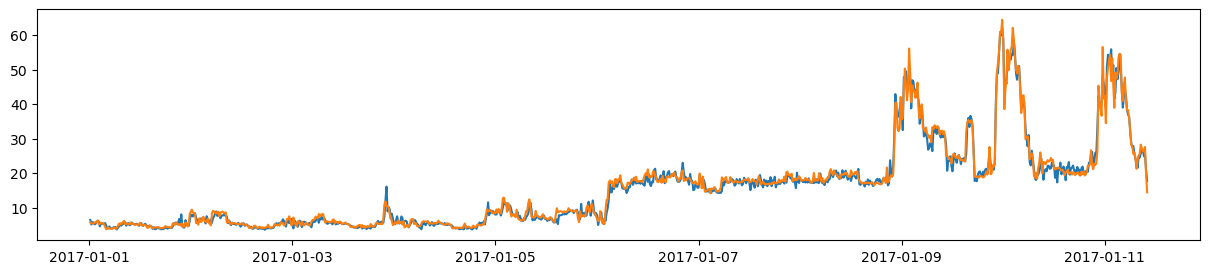

In [11]:
#Training anzeigen
train_predictions =model.predict(X_train).flatten() #Vektor of Predicitions, flatten=> ohne inner Brackets  , nicht extra train_predictions1 da sonst nicht für nächste Modelle angewandt
y_train=y_train.ravel()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Actuals':y_train})

# Rückgängig machen der Normalisierung
train_results['Train Predictions'] = train_results['Train Predictions'] * max_sum_kWh
train_results['Actuals'] = train_results['Actuals'] * max_sum_kWh

#Index anpassen
train_results.index = energy_df.index[:197068  ]

plt.figure(figsize=(15, 3))
plt.legend
plt.plot(train_results['Train Predictions'][:1000])
plt.plot(train_results['Actuals'][:1000])
train_results

325/325 [==============================] - 2s 5ms/step


,Val Predictions,Actuals
zeit,,
2022-08-15 14:15:00,6.107349,6.40
2022-08-15 14:30:00,6.229714,6.40
2022-08-15 14:45:00,6.205872,7.32
2022-08-15 15:00:00,6.513971,5.36
2022-08-15 15:15:00,5.278531,5.16
...,...,...
2022-12-01 12:30:00,7.625641,8.24
2022-12-01 12:45:00,7.531343,7.16
2022-12-01 13:00:00,7.347447,9.20


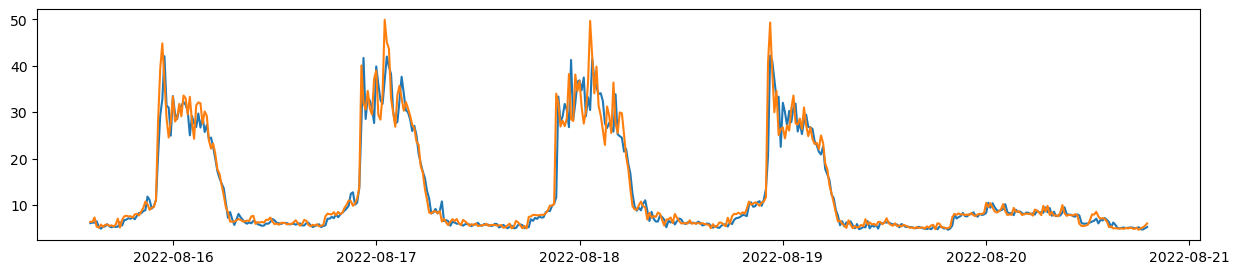

In [12]:
val_predictions= model.predict(X_val).flatten()
y_val=y_val.ravel() #y_val in 1D-Array sonst: ValueError: Per-column arrays must each be 1-dimensional
val_results = pd.DataFrame(data={'Val Predictions':val_predictions,'Actuals':y_val})

# Rückgängig machen der Normalisierung
val_results['Val Predictions'] = val_results['Val Predictions'] * max_sum_kWh
val_results['Actuals'] = val_results['Actuals'] * max_sum_kWh

#Index anpassen
val_results.index = energy_df.index[197068 :207438]


plt.figure(figsize=(15, 3))
plt.plot(val_results['Val Predictions'][:500])
plt.plot(val_results['Actuals'][:500])
val_results

1/1 [==============================] - 0s 12ms/step


,Test Predictions,Actuals
zeit,,
2022-12-01 23:45:00,7.012163,7.24
2022-12-02 00:00:00,7.365993,7.96


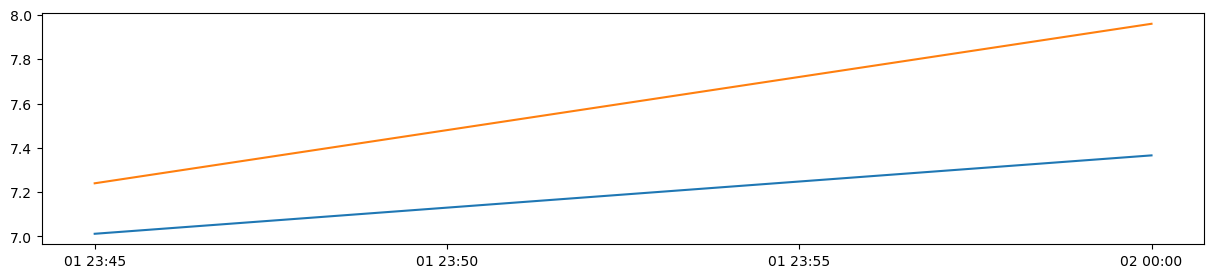

In [13]:
#Test= Endgültige Bewertung des Modells anhand völlig unbekannter Daten
test_predictions= model.predict(X_test).flatten()
y_test=y_test.ravel()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions,'Actuals':y_test})
# Rückgängig machen der Normalisierung
test_results['Test Predictions'] = test_results['Test Predictions'] * max_sum_kWh
test_results['Actuals'] = test_results['Actuals'] * max_sum_kWh

#Index anpassen
test_results.index = energy_df.index[207478:]

plt.figure(figsize=(15, 3))
plt.plot(test_results['Test Predictions'])
plt.plot(test_results['Actuals'])
test_results

30 Timestemps
    Test Predictions	Actuals
zeit		
2022-12-01 23:45:00	8.193428	7.24
2022-12-02 00:00:00	7.874347	7.96


20 Timestemps:
    Test Predictions	Actuals
zeit		
2022-12-01 23:45:00	6.161680	7.24
2022-12-02 00:00:00	5.858249	7.96

40 Timesteps 50 Epochs

Test Predictions	Actuals
zeit		
2022-12-01 23:45:00	7.495252	7.24
2022-12-02 00:00:00	7.574984	7.96


40 Timesteps 50 Epochs mehr Features (hour sin/cos und acverage sin Cos)
	Test Predictions	Actuals
zeit		
2022-12-01 23:45:00	7.012163	7.24
2022-12-02 00:00:00	7.365993	7.96

Weitere Feature Hinzufügen:

-Wetterdaten (Temperatur, Luftdruck, Wingeschwindigkeit, Sonnenauf und -untergang)
-Globalstrahlung
-Ferien (hat zu negativem Input geführt)
-Schülerzahl / Personen im Haushalt
-Betriebszeiten , Arbeitszeiten
